## Samarth Motka
## 202311023
## Lab_6

1. Consider the image of Fig.1, you have to first find Erosion and dilation and compound that result.You have to find the result of a morphological image.Which is shown in Output Image

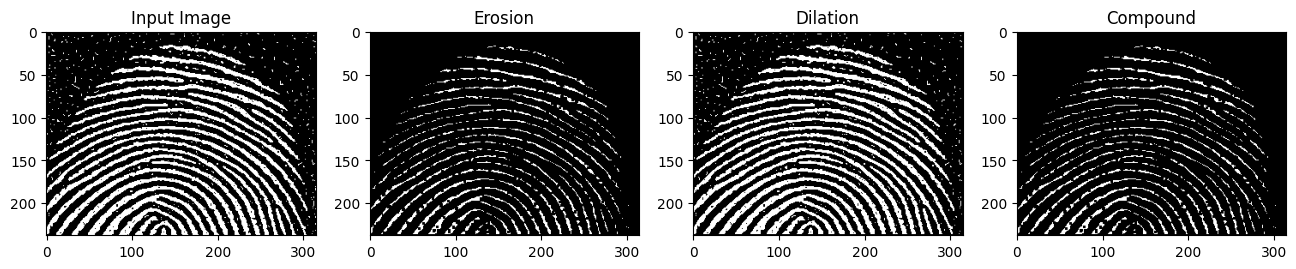

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

input_image = np.array(Image.open('/content/noisy_fingerprint (1).tif'))

kernel = np.ones((3, 3), np.uint8)

eroded_image = np.zeros_like(input_image)
for i in range(1, input_image.shape[0] - 1):
    for j in range(1, input_image.shape[1] - 1):
        patch = input_image[i-1:i+2, j-1:j+2]
        if np.all(patch == kernel[:, :, None]):
            eroded_image[i, j] = input_image[i, j]
        else:
            eroded_image[i, j] = 0
dilated_image = np.zeros_like(input_image)
for i in range(1, input_image.shape[0] - 1):
    for j in range(1, input_image.shape[1] - 1):
        patch = input_image[i-1:i+2, j-1:j+2]
        if np.any(patch == kernel[:, :, None]):
            dilated_image[i, j] = input_image[i, j]
        else:
            dilated_image[i, j] = 0
eroded_then_dilated = np.zeros_like(input_image)
for i in range(1, input_image.shape[0] - 1):
    for j in range(1, input_image.shape[1] - 1):
        patch = eroded_image[i-1:i+2, j-1:j+2]
        if np.any(patch == kernel[:, :, None]):
            eroded_then_dilated[i, j] = eroded_image[i, j]
        else:
            eroded_then_dilated[i, j] = 0

fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(input_image,cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(eroded_image,cmap='gray')
axs[1].set_title('Erosion')
axs[2].imshow(dilated_image,cmap='gray')
axs[2].set_title('Dilation')
axs[3].imshow(eroded_then_dilated,cmap='gray')
axs[3].set_title('Compound')

plt.show()


2. Write Python code to perform morphological boundary extraction using erosion and dilation operations.

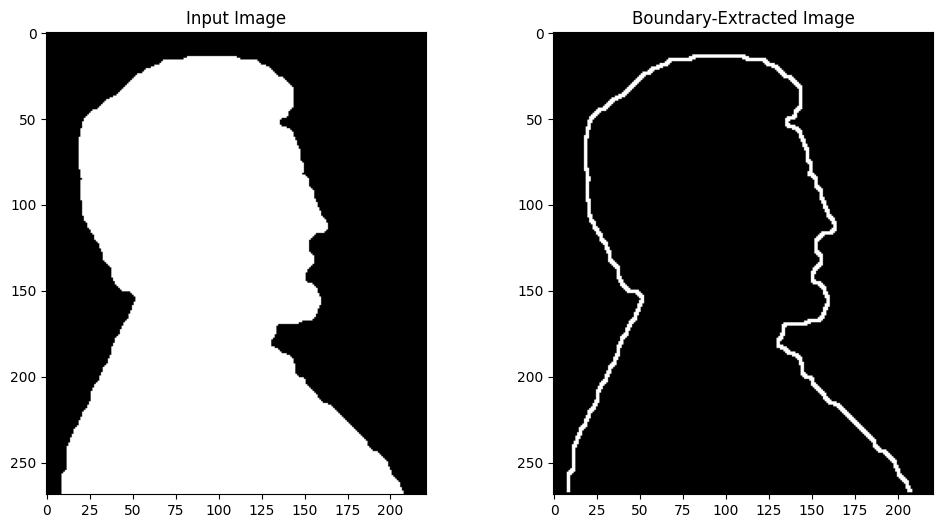

In [16]:
def morphological_boundary(input_image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_image = np.zeros_like(input_image, dtype=np.bool_)
    for i in range(1, input_image.shape[0] - 1):
        for j in range(1, input_image.shape[1] - 1):
            patch = input_image[i-1:i+2, j-1:j+2]
            if np.all(patch == kernel[:, :, None]):
                eroded_image[i, j] = True
            else:
                eroded_image[i, j] = False
    dilated_image = np.zeros_like(input_image, dtype=np.bool_)
    for i in range(1, input_image.shape[0] - 1):
        for j in range(1, input_image.shape[1] - 1):
            patch = input_image[i-1:i+2, j-1:j+2]
            if np.any(patch == kernel[:, :, None]):
                dilated_image[i, j] = True
            else:
                dilated_image[i, j] = False
    boundary_image = np.logical_xor(dilated_image, eroded_image)

    return boundary_image.astype(np.uint8) * 255

input_image = np.array(Image.open('/content/licoln_from_penny.tif'))

boundary_image = morphological_boundary(input_image)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(input_image, cmap='gray')
axs[0].set_title('Input Image')
axs[1].imshow(boundary_image, cmap='gray')
axs[1].set_title('Boundary-Extracted Image')
plt.show()

3. Opening and closing are two fundamental morphological operations used to remove noise, smooth edges, and separate objects in images.

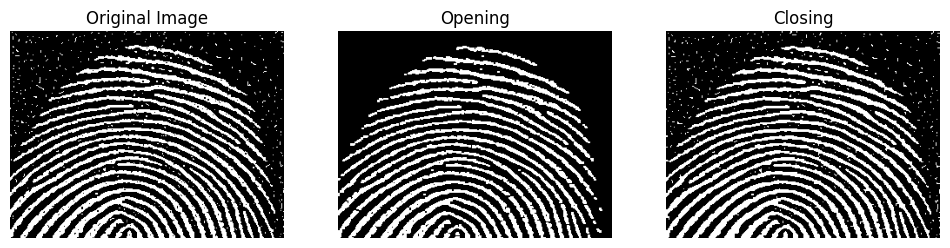

In [17]:


image = cv2.imread('/content/noisy_fingerprint (1).tif', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((2, 3), np.uint8)
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(image, kernel, iterations=1)
opening = cv2.dilate(cv2.erode(image, kernel, iterations=1), kernel, iterations=1)
closing = cv2.erode(cv2.dilate(image, kernel, iterations=1), kernel, iterations=1)
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.imshow(image, 'gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(232), plt.imshow(opening, 'gray'), plt.title('Opening'), plt.axis('off')
plt.subplot(233), plt.imshow(closing, 'gray'), plt.title('Closing'), plt.axis('off')
plt.show()